In [1]:
import sys

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sys.path.append("../src/")

In [4]:
from experiments.unify_results import load_data

In [5]:
df = load_data("../results/arl/")

In [6]:
df.shape

(600, 8)

In [7]:
df["len"] = df["detected_cps_at"].apply(lambda z : len(z))

In [8]:
df = df[df["len"] > 0]

In [9]:
df["arl"] = df["detected_cps_at"].apply(lambda z : np.mean(np.diff(z,prepend=0)))
df["arl2"] = df["detected_cps_at"].apply(lambda z : z[0])

In [10]:
df.config = df.config.str[10:-1].astype(float)

In [11]:
df = df.drop(84).drop(273).drop(496).drop(100).drop(536) # drop outliers

<Axes: xlabel='config', ylabel='arl2'>

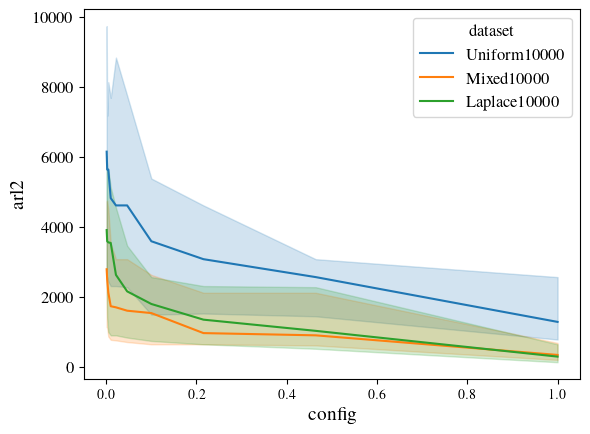

In [12]:
sns.lineplot(data=df, x="config", y="arl2", hue="dataset", estimator="median")

In [13]:
df.to_csv("../results/arl.csv")